[[ 5  9  5  5  4  1  6  1  4]
 [11  1  6 11  8 10 10  4  5]
 [11  9  1  1  7  6  4  9  8]
 [10  1  3  2  9  7  4  8  9]
 [ 4  1  3  9  9  7  7  4  6]
 [ 8  4  3  1  4  2  2  6  3]
 [11  6  5  7  2  3  5  6  9]
 [ 7  7  5  4 11 10  6 11  6]
 [ 8  6  3  5  3 10  7  3  8]]


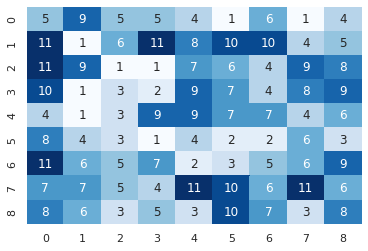

Number of rows:  9
Number of columns:  9


In [11]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

class BuildGrid():
  def grid(self):
    h = np.random.randint(5,12)
    w = np.random.randint(5,12)
    data = np.random.randint(1,12,size=(h,w))
    print(data)
    return data

  def showgrid(self):
    ax = sns.heatmap(g, annot=True, fmt="d", cbar = None, cmap=plt.cm.Blues)
    plt.show()

buildgrid = BuildGrid()
g = buildgrid.grid()
pg = buildgrid.showgrid()
roww = len(g)
coll = len(g[0])
print("Number of rows: ",roww)
print("Number of columns: ",coll)